### CITS4404 Practical Project

# Camo Worms - Evolutionary Algorithm

In [5]:
# imports
from camo_worms_utils import *
# import numpy as np

In [35]:
def cost(clew: list[Camo_Worm], worm_idx: int, w_internal: float=1.0, w_group: float=1.0):
    worm = clew[worm_idx]
    # ********************
    # internal
    
    # lets just say we want worms to be around 5 px wide
    # scale so that 5px => low score, lower or higher width => high score
    ideal = 5
    dist_from_ideal = worm.width - ideal

    internal_score = dist_from_ideal

    # ********************
    # group

    # lets get avg dist to other worms
    dists = []
    for i in range(len(clew)):
        if i is not worm_idx:
            euclid_dist = np.linalg.norm(np.array((worm.x, worm.y))-np.array((clew[i].x, clew[i].y)))
            # print(f"Worm centre ({worm.x}, {worm.y})")
            # print(f"Other worm centre ({clew[i].x}, {clew[i].y})")
            # print(f"Dist: {euclid_dist}")
            dists.append(euclid_dist)
    avg_dist = np.mean(dists)

    group_score = avg_dist
    # ********************
    # environment


    # return total weighted
    return internal_score*w_internal + group_score*w_group


    

Image name (shape) (intensity max, min, mean, std)

original (240, 720) (210, 0, 49.3, 34.8)


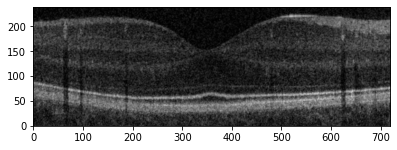

225.2018171276384


In [36]:
image = prep_image(IMAGE_DIR, IMAGE_NAME, MASK)
clew = initialise_clew(10, image.shape, (40, 30, 1))

for i in range(len(clew)):
    print(cost(clew=clew,worm_idx=i,w_internal=1,w_group=1))
    break